In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
# plotting style
import matplotlib as mpl
from matplotlib import rc
mpl.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size':30})
rc('text', usetex=True)

mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)

mpl.rcParams['xtick.major.size'] = 6.0
mpl.rcParams['xtick.major.width'] = 2.5
mpl.rcParams['ytick.major.size'] = 6.0
mpl.rcParams['ytick.major.width'] = 2.5

mpl.rcParams['axes.linewidth'] = 2.0
mpl.rcParams['patch.linewidth'] = 2.0
mpl.rcParams['xtick.major.pad'] = 14.0
mpl.rcParams['ytick.major.pad'] = 14.0

mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

mpl.rcParams['xtick.minor.size'] = 4.5
mpl.rcParams['xtick.minor.width'] = 1.25
mpl.rcParams['ytick.minor.size'] = 4.5
mpl.rcParams['ytick.minor.width'] = 1.25

import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

# Load data

In [3]:
# load predictions of ML model on validation set
filename = 'data/ML_regressor_validation_preds.pkl'
f = open(filename, "rb")
_ = pickle.load(f)
eval_preds = pickle.load(f)
eval_true = pickle.load(f)
f.close()

In [4]:
# load predictions of baseline model on validation set
filename = 'data/baseline_regressor_validation_preds.pkl'
f = open(filename, "rb")
_ = pickle.load(f)
eval_baselines = pickle.load(f)
_ = pickle.load(f)
f.close()

# Calculate summary statistics

In [5]:
ML_residuals1 = eval_true[:,0] - eval_preds[:,0]
ML_residuals2 = eval_true[:,2] - eval_preds[:,2]
ML_residuals3 = eval_true[:,4] - eval_preds[:,4]

In [6]:
ML_sigma1 = np.std(ML_residuals1)
ML_sigma2 = np.std(ML_residuals2)
ML_sigma3 = np.std(ML_residuals3)
ML_sigma1, ML_sigma2, ML_sigma3

(0.042677486186537855, 0.2701257112727529, 0.2658674908892944)

In [7]:
ML_bias1 = np.mean(ML_residuals1)
ML_bias2 = np.mean(ML_residuals2)
ML_bias3 = np.mean(ML_residuals3)
ML_bias1, ML_bias2, ML_bias3

(-0.0046179066934968005, 0.0070544124149331715, -0.010756861041138736)

In [8]:
baseline_residuals1 = eval_true[:,0] - eval_baselines[:,0]
baseline_residuals2 = eval_true[:,2] - eval_baselines[:,2]
baseline_residuals3 = eval_true[:,4] - eval_baselines[:,4]

In [9]:
baseline_sigma1 = np.std(baseline_residuals1)
baseline_sigma2 = np.std(baseline_residuals2)
baseline_sigma3 = np.std(baseline_residuals3)
baseline_sigma1, baseline_sigma2, baseline_sigma3

(0.04642310990454775, 0.37176032203015064, 0.5100452496591795)

In [10]:
baseline_bias1 = np.mean(baseline_residuals1)
baseline_bias2 = np.mean(baseline_residuals2)
baseline_bias3 = np.mean(baseline_residuals3)
baseline_bias1, baseline_bias2, baseline_bias3

(-0.010077707762267204, 0.02817545144234528, -0.30082431495402523)

# 2D histogram plot

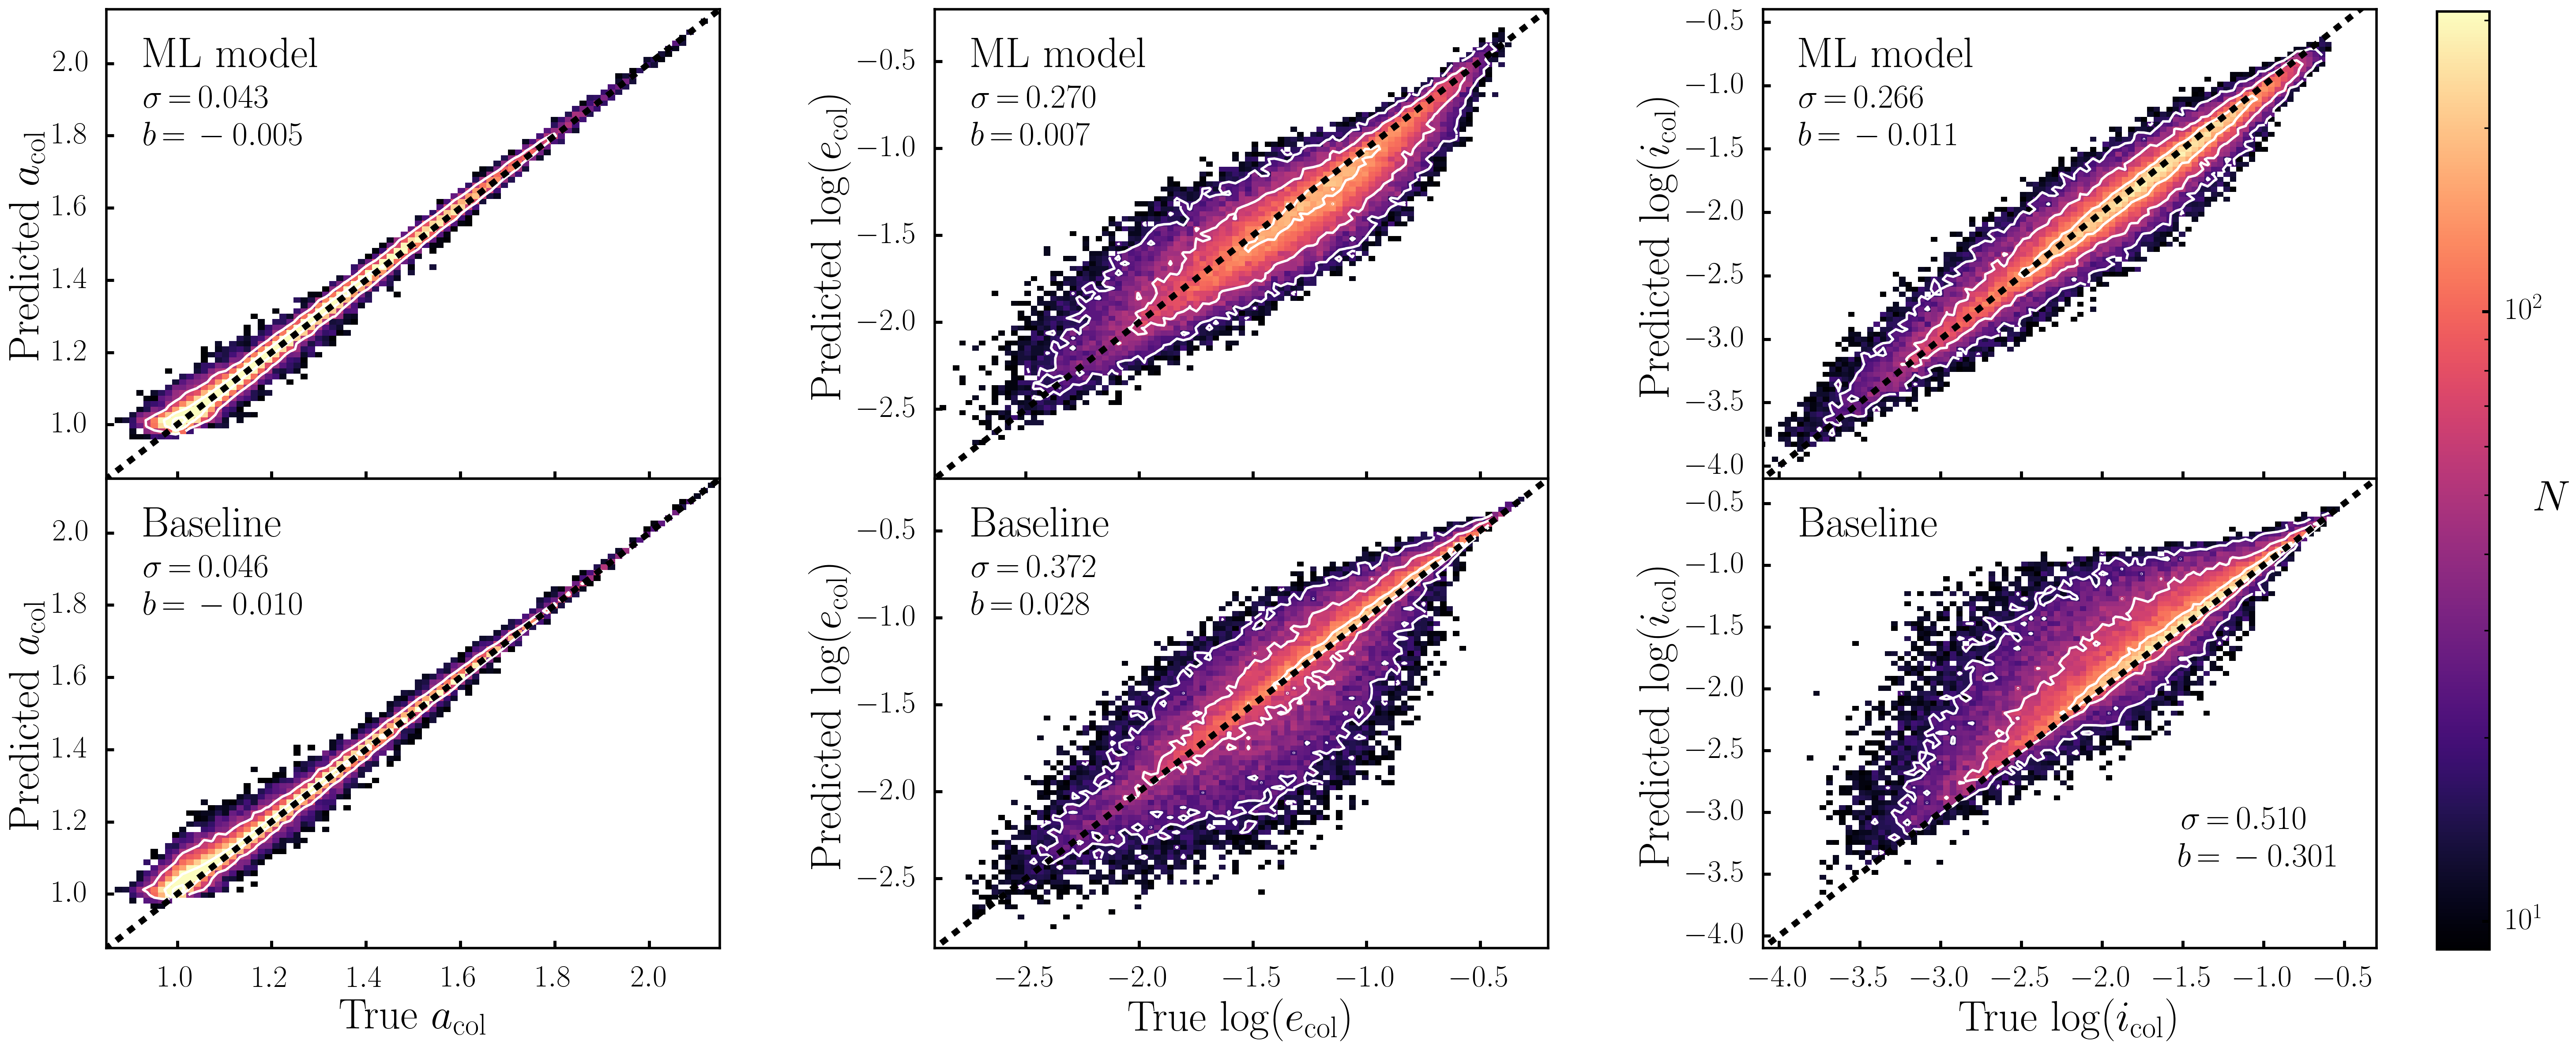

In [11]:
# plot parameters
bins = 110
cmin = 9
levels = 3
c = 0.06
c2 = 0.1
c3 = 0.08

# setup axes
fig, ax = plt.subplots(2, 3, figsize=(34.2,13.3), facecolor='white', sharex='col', dpi=200)

ax_min, ax_max = 0.85, 2.15
vals, x, y, hist = ax[0,0].hist2d(eval_true[:,0], eval_preds[:,0], bins=bins, range=[[ax_min*0.95, ax_max*1.15], [ax_min*0.95, ax_max*1.15]], cmin=cmin, norm=mpl.colors.LogNorm(vmin=9.0, vmax=310.0), cmap=mpl.cm.magma)
X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
ax[0,0].contour(X, Y, np.log(vals.T+1), levels=levels, colors='white', linewidths=2)
ax[0,0].plot(np.linspace(0.0, 5.0), np.linspace(0.0, 5.0), c='k', lw=5, ls='--', label=r'$y\,{=}\,x$')
ax[0,0].set_ylabel(r'Predicted $a_\mathrm{col}$', fontsize=35, labelpad=5)
ax[0,0].set_xlim([ax_min, ax_max])
ax[0,0].set_ylim([ax_min, ax_max])

ax[0,0].text(ax_min+c*(ax_max-ax_min), ax_max-c*(ax_max-ax_min), r'ML model', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[0,0].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2)*(ax_max-ax_min), r'$\sigma\,{=}\,0.043$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[0,0].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2+c3)*(ax_max-ax_min), r'$b\,{=}\,-0.005$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

ax_min, ax_max = -2.9, -0.2
vals, x, y, hist = ax[0,1].hist2d(eval_true[:,2], eval_preds[:,2], bins=bins, range=[[ax_min*1.15, ax_max*0.95], [ax_min*1.15, ax_max*0.95]], cmin=cmin, norm=mpl.colors.LogNorm(vmin=9.0, vmax=310.0), cmap=mpl.cm.magma)
X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
ax[0,1].contour(X, Y, np.log(vals.T+1), levels=levels, colors='white', linewidths=2)
ax[0,1].plot(np.linspace(-5.0, 1.0), np.linspace(-5.0, 1.0), c='k', lw=5, ls='--')
ax[0,1].set_ylabel(r'Predicted $\log(e_\mathrm{col})$', fontsize=35, labelpad=5)
ax[0,1].set_xlim([ax_min, ax_max])
ax[0,1].set_ylim([ax_min, ax_max])

ax[0,1].text(ax_min+c*(ax_max-ax_min), ax_max-c*(ax_max-ax_min), r'ML model', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[0,1].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2)*(ax_max-ax_min), r'$\sigma\,{=}\,0.270$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[0,1].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2+c3)*(ax_max-ax_min), r'$b\,{=}\,0.007$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

ax_min, ax_max = -4.1, -0.4
vals, x, y, hist = ax[0,2].hist2d(eval_true[:,4], eval_preds[:,4], bins=bins, range=[[ax_min*1.15, ax_max*0.95], [ax_min*1.15, ax_max*0.95]], cmin=cmin, norm=mpl.colors.LogNorm(vmin=9.0, vmax=310.0), cmap=mpl.cm.magma)
X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
ax[0,2].contour(X, Y, np.log(vals.T+1), levels=levels, colors='white', linewidths=2)
ax[0,2].plot(np.linspace(-5.0, 1.0), np.linspace(-5.0, 1.0), c='k', lw=5, ls='--')
ax[0,2].set_ylabel(r'Predicted $\log(i_\mathrm{col})$', fontsize=35, labelpad=5)
ax[0,2].set_xlim([ax_min, ax_max])
ax[0,2].set_ylim([ax_min, ax_max])

ax[0,2].text(ax_min+c*(ax_max-ax_min), ax_max-c*(ax_max-ax_min), r'ML model', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[0,2].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2)*(ax_max-ax_min), r'$\sigma\,{=}\,0.266$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[0,2].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2+c3)*(ax_max-ax_min), r'$b\,{=}\,-0.011$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

ax_min, ax_max = 0.85, 2.15
vals, x, y, hist = ax[1,0].hist2d(eval_true[:,0], eval_baselines[:,0], bins=bins, range=[[ax_min*0.95, ax_max*1.15], [ax_min*0.95, ax_max*1.15]], cmin=cmin, norm=mpl.colors.LogNorm(vmin=9.0, vmax=310.0), cmap=mpl.cm.magma)
X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
ax[1,0].contour(X, Y, np.log(vals.T+1), levels=levels, colors='white', linewidths=2)
ax[1,0].plot(np.linspace(0.0, 5.0), np.linspace(0.0, 5.0), c='k', lw=5, ls='--', label=r'$y\,{=}\,x$')
ax[1,0].set_xlabel(r'True $a_\mathrm{col}$', fontsize=35, labelpad=5)
ax[1,0].set_ylabel(r'Predicted $a_\mathrm{col}$', fontsize=35, labelpad=5)
ax[1,0].set_xlim([ax_min, ax_max])
ax[1,0].set_ylim([ax_min, ax_max])

ax[1,0].text(ax_min+c*(ax_max-ax_min), ax_max-c*(ax_max-ax_min), r'Baseline', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[1,0].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2)*(ax_max-ax_min), r'$\sigma\,{=}\,0.046$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[1,0].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2+c3)*(ax_max-ax_min), r'$b\,{=}\,-0.010$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

ax_min, ax_max = -2.9, -0.2
vals, x, y, hist = ax[1,1].hist2d(eval_true[:,2], eval_baselines[:,2], bins=bins, range=[[ax_min*1.15, ax_max*0.95], [ax_min*1.15, ax_max*0.95]], cmin=cmin, norm=mpl.colors.LogNorm(vmin=9.0, vmax=310.0), cmap=mpl.cm.magma)
X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
ax[1,1].contour(X, Y, np.log(vals.T+1), levels=levels, colors='white', linewidths=2)
ax[1,1].plot(np.linspace(-5.0, 1.0), np.linspace(-5.0, 1.0), c='k', lw=5, ls='--')
ax[1,1].set_xlabel(r'True $\log(e_\mathrm{col})$', fontsize=35, labelpad=5)
ax[1,1].set_ylabel(r'Predicted $\log(e_\mathrm{col})$', fontsize=35, labelpad=5)
ax[1,1].set_xlim([ax_min, ax_max])
ax[1,1].set_ylim([ax_min, ax_max])

ax[1,1].text(ax_min+c*(ax_max-ax_min), ax_max-c*(ax_max-ax_min), r'Baseline', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[1,1].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2)*(ax_max-ax_min), r'$\sigma\,{=}\,0.372$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')
ax[1,1].text(ax_min+c*(ax_max-ax_min), ax_max-(c+c2+c3)*(ax_max-ax_min), r'$b\,{=}\,0.028$', color = 'k', fontsize=27.5, horizontalalignment='left', verticalalignment='top')

ax_min, ax_max = -4.1, -0.3
vals, x, y, hist = ax[1,2].hist2d(eval_true[:,4], eval_baselines[:,4], bins=bins, range=[[ax_min*1.15, ax_max*0.95], [ax_min*1.15, ax_max*0.95]], cmin=cmin, norm=mpl.colors.LogNorm(vmin=9.0, vmax=310.0), cmap=mpl.cm.magma)
X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
ax[1,2].contour(X, Y, np.log(vals.T+1), levels=levels, colors='white', linewidths=2)
ax[1,2].plot(np.linspace(-5.0, 1.0), np.linspace(-5.0, 1.0), c='k', lw=5, ls='--')
ax[1,2].set_xlabel(r'True $\log(i_\mathrm{col})$', fontsize=35, labelpad=5)
ax[1,2].set_ylabel(r'Predicted $\log(i_\mathrm{col})$', fontsize=35, labelpad=5)
ax[1,2].set_xlim([ax_min, ax_max])
ax[1,2].set_ylim([ax_min, ax_max])

ax[1,2].text(ax_min+c*(ax_max-ax_min), ax_max-c*(ax_max-ax_min), r'Baseline', color = 'k', fontsize=35, horizontalalignment='left', verticalalignment='top')
ax[1,2].text(ax_max-c*(ax_max-ax_min)-0.2, ax_min+(c+c2+c3)*(ax_max-ax_min), r'$\sigma\,{=}\,0.510$', color = 'k', fontsize=27.5, horizontalalignment='right', verticalalignment='bottom')
ax[1,2].text(ax_max-c*(ax_max-ax_min), ax_min+(c+c2)*(ax_max-ax_min), r'$b\,{=}\,-0.301$', color = 'k', fontsize=27.5, horizontalalignment='right', verticalalignment='bottom')

cbar_ax = fig.add_axes([0.897, 0.099, 0.0175, 0.799])
cbar = fig.colorbar(hist, cax=cbar_ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_label(r'$N$', fontsize=35, rotation=0, labelpad=5)

fig.subplots_adjust(hspace=0.0, wspace=0.35, right=0.877)
plt.show()